# <span style="color:#F72585"><center>Tensores, redes neuronales e imágenes</center></span>

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Matematicas/Imagenes/Red_neuronal_de_dos_capas.jpg" width="600" height="400" align="center" /> 
</center>   
</figure>
<center>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Red_neuronal_de_dos_capas.jpg">SheilaUACAM</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

</center>


## <span style="color:#4361EE">Introducción</span>

En esta lección nos acercamos al objeto de trabajo del aprendizaje profundo: las redes neuronales. La hacemos mostrando como usamos tensores para representar redes neuronales. Adicionalmente, veremos como usamos los tensores en la representación de imágenes, uno de los tipos de datos más recurrente en la inteligencia artificial.

## <span style="color:#4361EE">Redes Neuronales</span>

La siguiente imagen muestra el estado en un instante de una una parte oculta de una red  neuronal profunda.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Matematicas/Imagenes/fragmento_red.png" width="500" height="300" /> 
</center>
</figure>

Fuente: Alvaro Montenegro

El proceso puede modelarse en forma simplificada usando matrices y vectores como se ve a continuación.

$$
W_{12}L_1 = L2 \to \begin{pmatrix} -1 & 0.4 & 1.5\\ 0.8 & 0.5 & 0.75 \\ 0.2 & -0.3  & 1\\ \end{pmatrix}\begin{pmatrix} 2.5\\ 4  \\ 1.2 \end{pmatrix} = \begin{pmatrix} 0.9\\ 4.9 \\ 0.5 \end{pmatrix}
$$

Observe por ejemplo que:

$$-1\times 2.5 + 0.4\times 4  + 1.5\times 1.2 = 0.9$$

En la fase de entrenamiento de la red neuronal, los pesos de la matriz se van modificando hasta que se encuentra un óptimo local. Este proceso ocurre en toda la estructura de la red.

Por lo que no parece extraño que las GPU y las  TPU pasen todo el tiempo haciendo operaciones de este tipo, que al final se reduce a sumas y multiplicaciones.

Por otro lado, lo que ocurre es que los objetos que se procesan no necesariamente son vectores como en el ejemplo, y esto lleva a la necesidad de generalizar los conceptos.


## <span style="color:#4361EE">Imágenes a color</span>

De manera clásica una imagen a color está compuesta de tres colores primarios: rojo (*Red*), verde (*Green*) y azul (*Blue*). Para generar una imagen a color un computador maneja tres planos de color, los cuales son controlados desde tensores tridimensionales. Considere el siguiente ejemplo.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Matematicas/Imagenes/zeus_2.png" width="600" height="300" /> 
</center>
</figure>

Fuente: Alvaro Montenegro

Cada pixel (*punto*) de la imagen es representado por una valor numérico en el rango de 0 a 255, o en rango de valores reales entre cero y 1.

## <span style="color:#4361EE">Construcción aleatoria de una imagen</span>

Considere el siguiente código Python.

In [1]:
import numpy as np
I=np.random.randint(0,255,size=(3,10,10))
print(I)

[[[172   5 170 186 215  22  72 171 176 196]
  [ 95  21 174 182  56 204  14  81 195  95]
  [121 189 160 252 210 141 213 192 179 239]
  [158 115  98 101  66  23  42 159 129  24]
  [175  62  30 178  31 193 225 219 203  54]
  [ 67  87  75 198 111 149  27 160 100 192]
  [210 207  85 125  40  47 128 188 193 223]
  [138  25  83 124 127 243 101  51 107  70]
  [111 211 134 184 237 180  54  90 240 169]
  [122  72 115 136 146  19 178 240  75 119]]

 [[ 22 190 156 214 185 214   8 239 107  85]
  [  5 181 164  89  33  28  51  78 117 252]
  [ 28 128 249  87 223  27  82 193   4 151]
  [202 241 204 164 237 106  84 205 237  68]
  [157   5 141  55  42  68 113 140 195 228]
  [  5 135 190 131  87 224  59  69 226 194]
  [ 15 180 111 178 152 205   5  94 227  97]
  [141 205  52 156 185 110  82 253  47 102]
  [117 147  57  24  26  57  75 118  76  76]
  [  6 181  84 141 175 228 222  74 173  42]]

 [[164 235  38 114 208 179  42 235 142 235]
  [181 221  61  13 133 189 226 193 120 226]
  [ 95  62  62 235 128 147 2

Este tensor representa una imagen de tamaño $10 \times 10$. Son tres planos de color $10 \times 10$.

Observe que la primera dimensión corresponde a cada plano de color y las restantes dos dimensiones a las intensidades de cada color para cada punto.

Renderizar (dibujar en este caso), nos lleva a la siguiente imagen. Para esta sección require instalar matplotlib

In [2]:
# !conda install -c conda-forge matplotlib

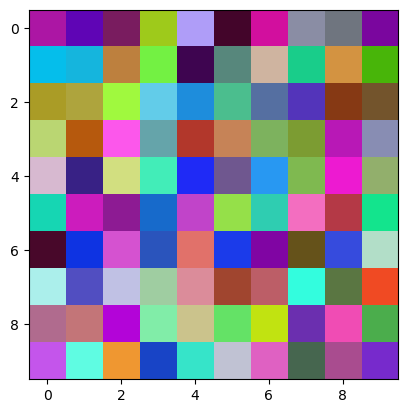

In [3]:
import matplotlib.pyplot as plt

plt.imshow(I.T)
plt.show()


Observe que 

In [4]:
(I.T).shape

(10, 10, 3)

Porque Python maneja las imágenes en este formato: Fila, columna y plano de color.

## <span style="color:#4361EE">Imagen real</span>

Vamos a trabajar ahora con una imagen real. Para este ejercicio requiere instalar  `sklearn`. 

In [5]:
# conda install -c anaconda scikit-image

c:\Users\User\anaconda3\envs\work\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


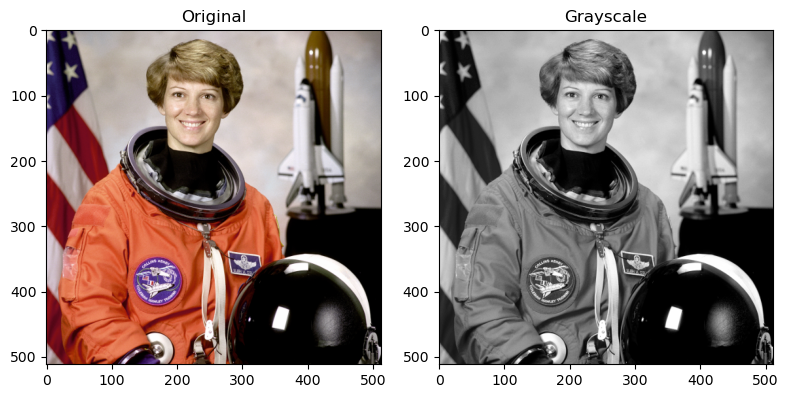

In [6]:
import numpy as np
import matplotlib.pyplot as plt


from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [7]:
Idata=np.array(grayscale)
print("\nLa imagen tiene forma: ",Idata.shape,"\n")
print(Idata)


La imagen tiene forma:  (512, 512) 

[[5.83434902e-01 4.14859216e-01 2.44058431e-01 ... 4.75007843e-01
  4.58213333e-01 4.69121961e-01]
 [6.75588235e-01 5.56006667e-01 4.49052941e-01 ... 4.68548627e-01
  4.56501176e-01 4.55958431e-01]
 [7.66334902e-01 7.00524314e-01 6.49276078e-01 ... 4.76406667e-01
  4.62104314e-01 4.53978431e-01]
 ...
 [6.81696471e-01 6.81979216e-01 6.71889020e-01 ... 0.00000000e+00
  2.82745098e-04 0.00000000e+00]
 [6.74694510e-01 6.68532941e-01 6.64030196e-01 ... 2.82745098e-04
  3.92156863e-03 0.00000000e+00]
 [6.70482353e-01 6.63189804e-01 6.52838824e-01 ... 0.00000000e+00
  3.92156863e-03 0.00000000e+00]]


## <span style="color:#4361EE">Planos de color</span>

In [8]:
Idata = np.array(original)
print("\nLa imagen tiene forma: ",Idata.shape,"\n")
print("\nEscala de Rojos:\n\n",Idata[:511,:511,0],"\n")
print("\nEscala de Verdes:\n\n",Idata[:511,:511,1],"\n")
print("\nEscala de Azules:\n\n",Idata[:511,:511,2],"\n")


La imagen tiene forma:  (512, 512, 3) 


Escala de Rojos:

 [[154 109  63 ... 126 127 120]
 [177 144 113 ... 126 127 124]
 [201 182 168 ... 125 128 126]
 ...
 [186 188 184 ...   0   0   0]
 [186 186 183 ...   2   0   0]
 [183 182 185 ...  21   0   1]] 


Escala de Verdes:

 [[147 103  58 ... 120 120 117]
 [171 141 114 ... 118 118 115]
 [194 178 165 ... 119 120 116]
 ...
 [169 169 167 ...   0   0   0]
 [170 170 168 ...   2   0   0]
 [169 167 164 ...  21   0   1]] 


Escala de Azules:

 [[151 124 102 ... 114 115 106]
 [171 143 124 ... 111 112 108]
 [193 175 164 ... 113 117 112]
 ...
 [174 177 170 ...   0   0   1]
 [176 177 170 ...   3   0   1]
 [170 171 176 ...  16   1   1]] 



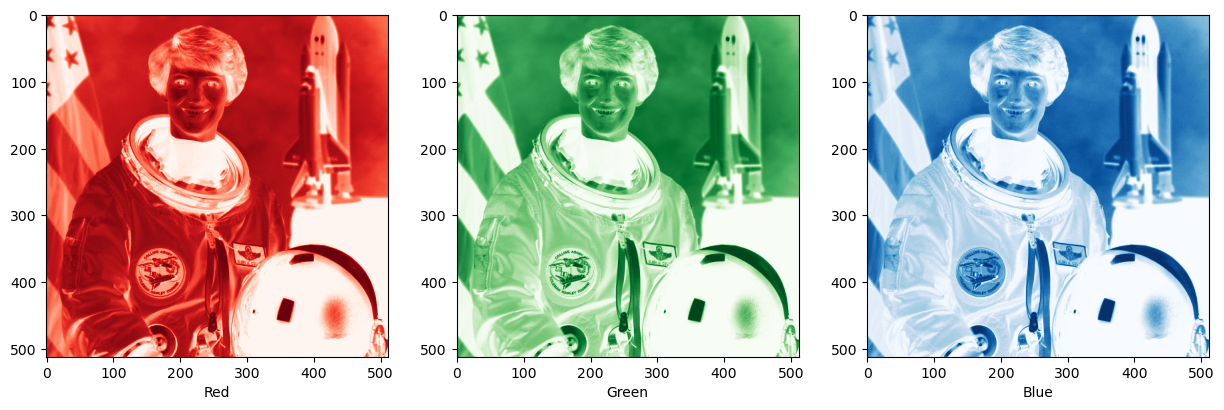

In [9]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))

ax1.imshow(Idata[:,:,0],cmap="Reds")
ax1.set_xlabel('Red')
ax2.imshow(Idata[:,:,1],cmap="Greens")
ax2.set_xlabel('Green')
ax3.imshow(Idata[:,:,2],cmap="Blues")
ax3.set_xlabel('Blue')
plt.show()

## <span style="color:#4361EE">Manipulación  de imágenes</span>

### <span style="color:#4CC9F0">Intercambia dos planos de color</span>

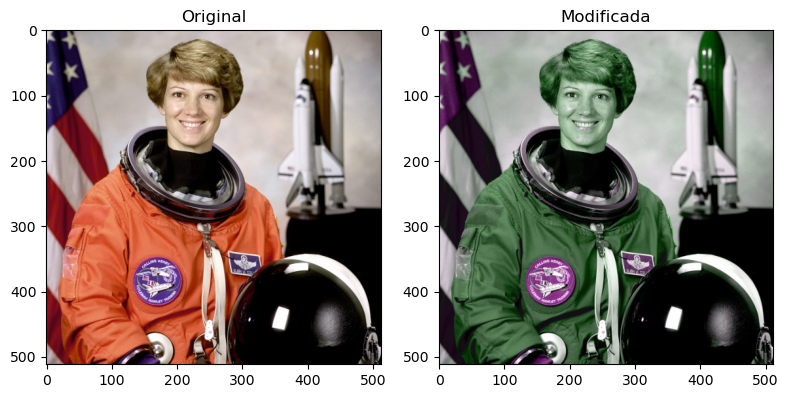

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()

Idata_m = Idata
Idata_m[:,:,0], Idata_m[:,:,2] = Idata_m[:,:,2], Idata_m[:,:,0]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(Idata_m)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

### <span style="color:#4CC9F0">Suma una constante a la imagen</span>

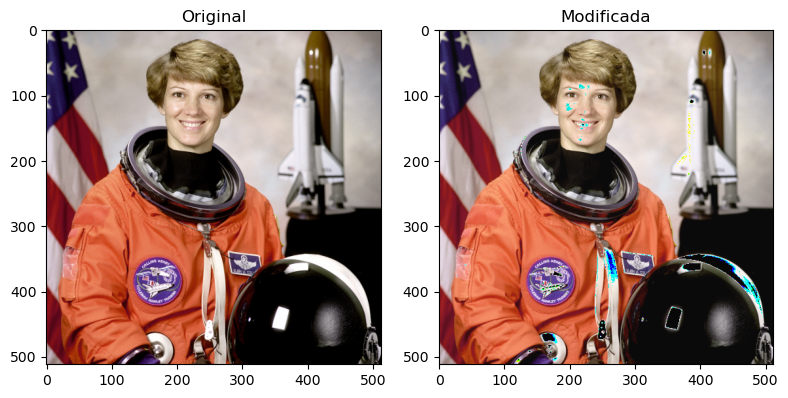

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

k = 10
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(original + k)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

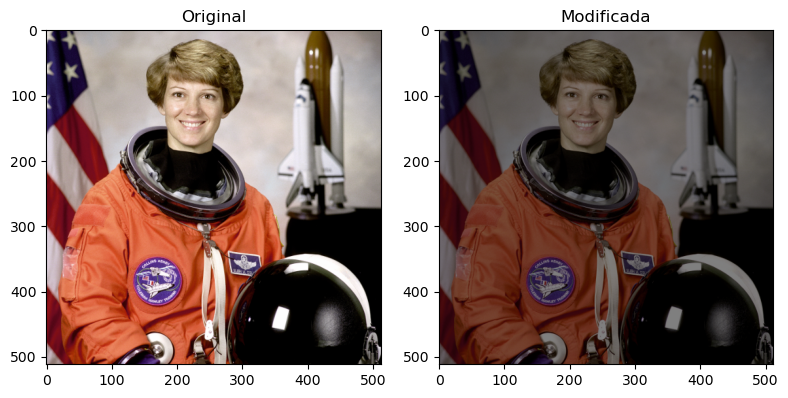

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

k = 2
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(original //k)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

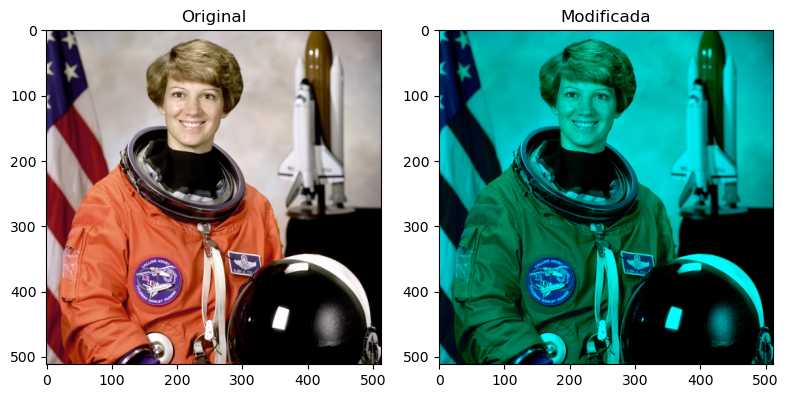

In [13]:
Idata_m = Idata

Idata_m[:,:,0 ]=0

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(Idata_m)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

In [14]:
Idata

array([[[  0, 147, 151],
        [  0, 103, 124],
        [  0,  58, 102],
        ...,
        [  0, 120, 115],
        [  0, 117, 106],
        [  0, 119, 110]],

       [[  0, 171, 171],
        [  0, 141, 143],
        [  0, 114, 124],
        ...,
        [  0, 118, 112],
        [  0, 115, 108],
        [  0, 116, 105]],

       [[  0, 194, 193],
        [  0, 178, 175],
        [  0, 165, 164],
        ...,
        [  0, 120, 117],
        [  0, 116, 112],
        [  0, 114, 109]],

       ...,

       [[  0, 170, 176],
        [  0, 170, 177],
        [  0, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[  0, 169, 170],
        [  0, 167, 171],
        [  0, 164, 176],
        ...,
        [  0,   0,   1],
        [  0,   1,   1],
        [  0,   0,   0]],

       [[  0, 167, 172],
        [  0, 165, 169],
        [  0, 162, 171],
        ...,
        [  0,   0,   0],
        [  0,   1,   1],
        [  0,   0,   0]]

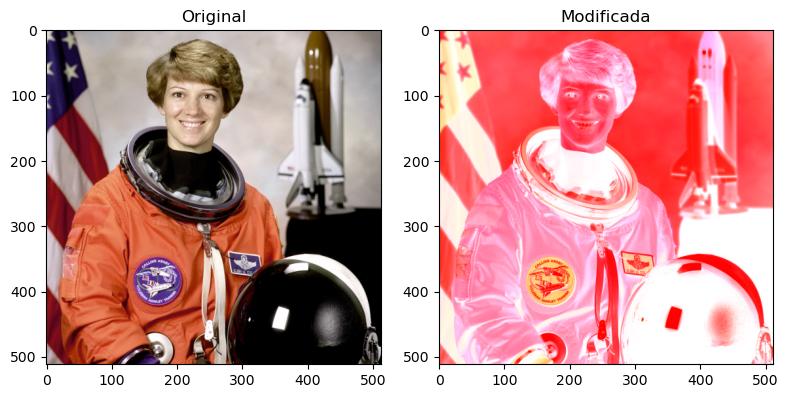

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(255 - Idata)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

## <span style="color:#4361EE">Colocar dos imagenes en un tensor</span>

Esta es una forma para organizar conjuntos de imágenes en un único tensor

In [16]:
original= np.expand_dims(original,axis=0)

In [17]:
original.shape

(1, 512, 512, 3)

In [18]:
Idata_m= np.expand_dims(Idata_m,axis=0)

In [19]:
images = np.concatenate((original, Idata_m),axis=0)

In [20]:
images.shape

(2, 512, 512, 3)

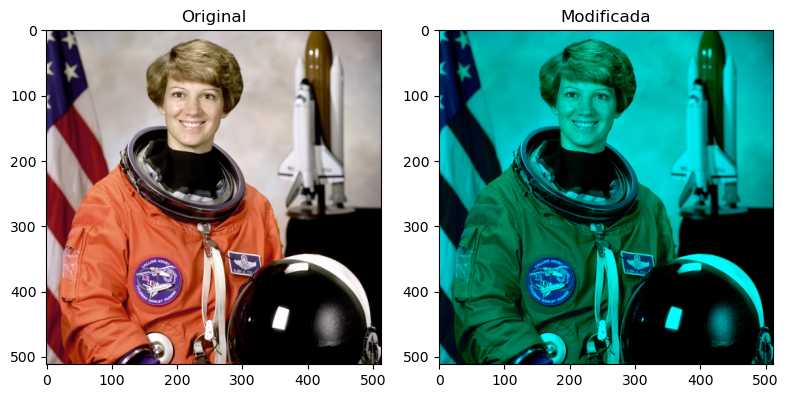

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(images[0])
ax[0].set_title("Original")
ax[1].imshow(images[1])
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

## <span style="color:#4361EE">Ejercicios</span>

1. Baje una imagen de Internet y la almacena localmente, o léala por ejemplo del repositorio de Aprendizaje Profundo.
2. Lea la imagen. Apóyese en el siguiente código
3. Repita el tratamiento de la imagen como hicimos en la lección

La imagen del ave fue tomada originalmente de [omes-va.com](https://omes-va.com/trasladar-rotar-escalar-recortar-una-imagen-opencv/).

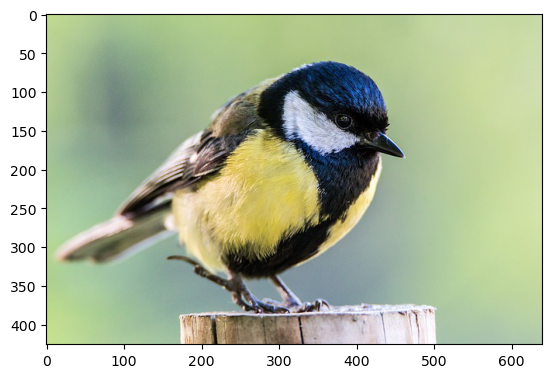

(426, 640, 3)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

file_1 = "https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Matematicas/Imagenes/ave.jpeg"

# Fuente: Esta es la imagen original tomada de [omes-va.com](https://omes-va.com/trasladar-rotar-escalar-recortar-una-imagen-opencv/). Código tomado del mismo sitio.
img_array=io.imread(file_1) 
plt.imshow(img_array)
plt.show()

original = np.array(img_array)
original.shape